Для начала импортируем нужные модули


In [0]:
import pandas as pd
import requests

Далее пишем небольшой парсер для удобной выгрузки данных и выгружаем с сайта "gov.spb.ru" результаты прошедших выборов для своего района. У меня это Красногвардейский район и к нему относятся 4 и 25 Территориальные избирательные комиссии. 


---


*Для удобства уберём строки с ненужными нам дальше для анализа данными и выведем полученные таблички по УИКам*

In [2]:
tic4 = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217422&type=222"
tic25 = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217443&type=222"

def parser(url):
  response = requests.get(url)
  icom = pd.read_html(url, encoding='cp1251', header = 0)[7]
  icom.drop([1],inplace = True)
  for i in range(icom.shape[1]): 
    icom.iloc[1,i] = int(icom.iloc[1,i]) + int(icom.iloc[2,i]) 
    for j in range(3):
      icom.iloc[(11+j),i] = (icom.iloc[(11+j),i]).split()[1] 
  icom.drop([int(k) for k in range(3,12)], inplace = True)
  return(icom)
    
icomps1 = parser(tic4)
icomps2 = parser(tic25)

print(icomps1)
print(icomps2)

   УИК №901 УИК №902 УИК №903 УИК №904  ... УИК №962 УИК №963 УИК №964 УИК №965
0      1145     2041     2378     2354  ...     2371     2664      205      355
2       223      540      641      636  ...      619      693      205      336
12    8.52%   10.37%   16.38%   15.09%  ...    9.48%   12.86%   10.24%    9.23%
13   73.09%   66.30%   61.47%   61.32%  ...   52.12%   51.30%   73.17%   75.00%
14   17.49%   21.67%   18.72%   18.40%  ...   36.11%   34.39%   16.10%   13.69%

[5 rows x 65 columns]
   УИК №973 УИК №974 УИК №975 УИК №976  ... УИК №1044 УИК №1045 УИК №1046 УИК №1047
0      1874     1894     1649     2346  ...      1454      2398      2291       503
2       520      468      407      677  ...       378       749       741       177
12   10.19%   12.18%   11.85%   16.10%  ...    11.11%     9.81%    11.34%    12.43%
13   67.88%   66.03%   63.95%   62.92%  ...    69.58%    66.62%    64.91%    74.01%
14   19.42%   19.66%   21.98%   19.20%  ...    16.93%    20.71%    21.05%    

Теперь соберем данным по проценту явки отдельно по всем УИКам:

In [0]:
procent_appearence = []
procent_appearence1 = []
procent_appearence2 = []
k1=0
k2=0
for i in range(icomps1.shape[1]): #1-столбцы,0-строки(все)
    procent = int(icomps1.iloc[1, i])/(int(icomps1.iloc[0,i]))
    procent_appearence1.append(procent*100)
    k1=k1+1
for i in range(icomps2.shape[1]): #1-столбцы,0-строки(все)
    procent = int(icomps2.iloc[1, i])/(int(icomps2.iloc[0,i]))
    procent_appearence2.append(procent*100)
    k2=k2+1
procent_appearence = procent_appearence1 + procent_appearence2
#print(procent_appearence)

И также соберем данные по процентам голосов за каждого из кандидатов по отдельности *(из сводной таблицы с сайта просто отбросим проценты для удобства в последующей работе с данными)*  

In [0]:
Amosov = []
Beglov = []
Tikhonova = []
appearence = []
for i in range(icomps1.shape[1]):
    Amosov.append(float(icomps1.iloc[2, i].split("%")[0]))
    Beglov.append(float(icomps1.iloc[3, i].split("%")[0]))
    Tikhonova.append(float(icomps1.iloc[4, i].split("%")[0]))
    appearence.append(int(icomps1.iloc[0,i]))
for i in range(icomps2.shape[1]):
    Amosov.append(float(icomps2.iloc[2, i].split("%")[0]))
    Beglov.append(float(icomps2.iloc[3, i].split("%")[0]))
    Tikhonova.append(float(icomps2.iloc[4, i].split("%")[0]))
    appearence.append(int(icomps2.iloc[0,i]))
#print(Amosov)
#print(Beglov)
#print(Tikhonova)

Наконец, используя  модуль matplotlib.pyplot мы можем визуализировать выбранные ранее данные.


---

Первый график - график зависимости процента голосов от процента явки избирателей в Красногвардейском районе.
*(На отдельных УИКах)*


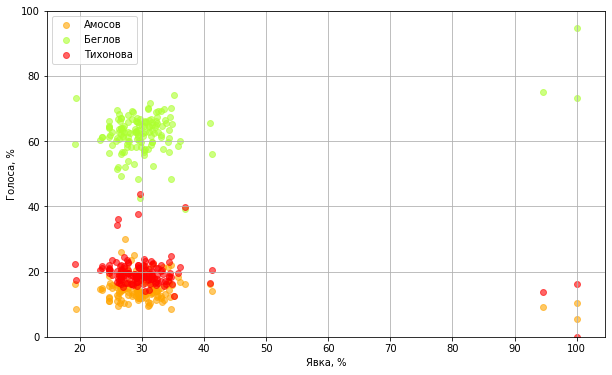

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(procent_appearence, Amosov, label = 'Амосов', color = 'orange', alpha=0.6)
plt.scatter(procent_appearence, Beglov, label = 'Беглов', color = 'greenyellow', alpha=0.6)
plt.scatter(procent_appearence, Tikhonova, label = 'Тихонова', color = 'red', alpha=0.6)
plt.xlabel('Явка, %')
plt.ylabel('Голоса, %')
plt.ylim(0, 100)
plt.grid()
plt.legend()
plt.show()

Следующий, второй график соответствует зависимости процентной явки от колличества избирателей на отдельных УИКах всего Красногвардейского района. 

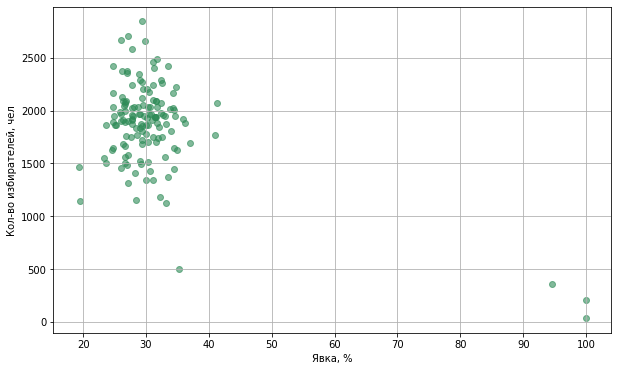

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(procent_appearence,appearence, color = 'seagreen', alpha=0.6)
plt.ylabel(u'Кол-во избирателей, чел')
plt.xlabel(u'Явка, %')
plt.grid()
plt.show()

Далее, с помощью numpy мы можем в виде графика представить статистику явки от числа участников выборов во всём Красногвардейском районе.

In [0]:
import numpy as np
k_icomps = np.array([])
for i in range(101):
  k_icomps = np.append(k_icomps, 0)
for i in procent_appearence:
    for j in range(101):
        if (((j - 0.5) < i) and (i <= (j + 0.5))):
            k_icomps[j] +=1

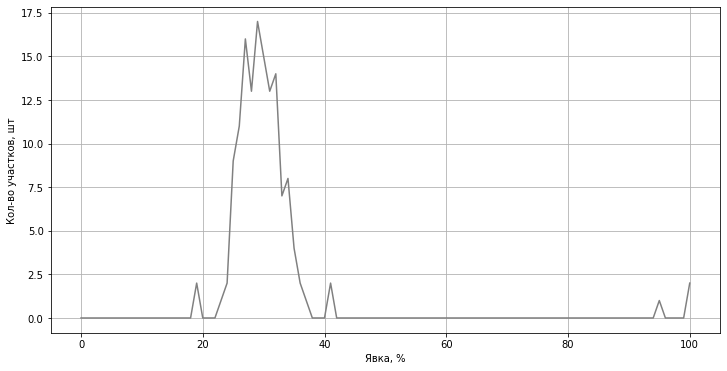

In [9]:
plt.figure(figsize=(12,6))
yavka = np.arange(101)
plt.plot(yavka, k_icomps, color = 'grey')
plt.ylabel(u'Кол-во участков, шт')
plt.xlabel(u'Явка, %')
plt.grid()
plt.show()

Анализируя полученные выше графики, мы можем заметить, что некоторые значения уж очень сильно выбиваются из общей картины и не соответствуют нормальному распределению статистических данных. Поэтому проверяем собранные данные и выявляем те самые аномальные выбросы среди общей статистики:  

In [10]:
import math
avarage_appearence = 0.0
k = 0
for i in range (k1+k2):
    k = k+1
    avarage_appearence = avarage_appearence + procent_appearence[i]
#print(k)
avarage_appearence =avarage_appearence/k
# print(avarage_appearence)
s = 0.0
for i in range (k1+k2):
    s = s + (procent_appearence[i] - avarage_appearence)*(procent_appearence[i] - avarage_appearence)
delta = math.sqrt(s/(k1+k2))
# print(delta)
anomal = []
anomal_Amosov = []
anomal_Beglov = []
anomal_Tikhonova = []
print('Аномальные значение явки в УИК равны: ')
print('____________________')
for i in range (k1+k2):    
    if not ((avarage_appearence - 2*delta)<=(procent_appearence[i])<=(avarage_appearence + 2*delta)):      
            print(round(procent_appearence[i],2),'%') 
            print('Из них:')
            print('За Амосова',Amosov[i],'%')
            print('За Беглова',Beglov[i],'%') 
            print('За Тихонову',Tikhonova[i],'%')
            print('____________________')

Аномальные значение явки в УИК равны: 
____________________
100.0 %
Из них:
За Амосова 5.41 %
За Беглова 94.59 %
За Тихонову 0.0 %
____________________
100.0 %
Из них:
За Амосова 10.24 %
За Беглова 73.17 %
За Тихонову 16.1 %
____________________
94.65 %
Из них:
За Амосова 9.23 %
За Беглова 75.0 %
За Тихонову 13.69 %
____________________
